# __Proyek Analisis Data: Air Quality Dataset__


- Nama: Randy Cheasario Sam
- Email: cheasario91@gmail.com
- ID Dicoding: randy_sam

# __Pertanyaan Bisnis__

1. Bagaimana distribusi dari setiap polutan? (PM2.5, PM10, SO2, NO2, CO)
2. Bagaimana korelasi antara polutan dengan temperatur suhu?
3. Apakah ada tahun dan bulan tertentu dengan tingkat polusi lebih tinggi? 

# __Import Library__

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# __1. Data Wrangling__

### 1.1. Data Gathering

In [2]:
aotizhongxin_df = pd.read_csv("dataset/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
aotizhongxin_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [3]:
aotizhongxin_df.tail()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin
35063,35064,2017,2,28,23,19.0,31.0,10.0,79.0,600.0,42.0,8.6,1014.1,-15.9,0.0,NNE,1.3,Aotizhongxin


In [4]:
changping_df = pd.read_csv("dataset/PRSA_Data_Changping_20130301-20170228.csv")
changping_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [5]:
dingling_df = pd.read_csv("dataset/PRSA_Data_Dingling_20130301-20170228.csv")
dingling_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [6]:
dongsi_df = pd.read_csv("dataset/PRSA_Data_Dongsi_20130301-20170228.csv")
dongsi_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


In [7]:
guanyuan_df = pd.read_csv("dataset/PRSA_Data_Guanyuan_20130301-20170228.csv")
guanyuan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


In [8]:
gucheng_df = pd.read_csv("dataset/PRSA_Data_Gucheng_20130301-20170228.csv")
gucheng_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


In [9]:
huairou_df = pd.read_csv("dataset/PRSA_Data_Huairou_20130301-20170228.csv")
huairou_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


In [10]:
nongzhanguan_df = pd.read_csv("dataset/PRSA_Data_Nongzhanguan_20130301-20170228.csv")
nongzhanguan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


In [11]:
shunyi_df = pd.read_csv("dataset/PRSA_Data_Shunyi_20130301-20170228.csv")
shunyi_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


In [12]:
tiantan_df = pd.read_csv("dataset/PRSA_Data_Tiantan_20130301-20170228.csv")
tiantan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


In [13]:
wanliu_df = pd.read_csv("dataset/PRSA_Data_Wanliu_20130301-20170228.csv")
wanliu_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


In [14]:
wanshouxigong_df = pd.read_csv("dataset/PRSA_Data_Wanshouxigong_20130301-20170228.csv")
wanshouxigong_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


__Insights:__

1. Tiap dataset masing-masing memiliki 18 kolom
2. 16 kolom merupakan kolom numerik dan 2 kolom merupakan kolom kategorik

___

1. Each dataset has 18 columns
2. 16 columns are numeric columns and 2 columns are categorical columns

### 1.2. Data Assessing

Menyatukan semua dataset yang bertujuan mengetahui kualitas udara di Kota Beijing secara keseluruhan

___

Combine all datasets aimed at understanding the air quality in Beijing City as a whole

In [15]:
beijing_airquality_df = pd.concat([aotizhongxin_df, changping_df, dingling_df, dongsi_df, guanyuan_df, gucheng_df, huairou_df, nongzhanguan_df, shunyi_df, tiantan_df, wanliu_df, wanshouxigong_df], axis=0, ignore_index=True)
beijing_airquality_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


In [16]:
beijing_airquality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [17]:
beijing_airquality_df.isnull().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [18]:
print(f"Jumlah Data Duplikat: {beijing_airquality_df.duplicated().sum()}")
print(f"Jumlah Missing Values: {beijing_airquality_df.isnull().sum().sum()}")

Jumlah Data Duplikat: 0
Jumlah Missing Values: 74027


In [19]:
beijing_airquality_df.describe().round(2)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.00,420768.00,420768.00,420768.00,420768.00,412029.00,414319.00,411747.00,408652.00,400067.00,407491.00,420370.00,420375.00,420365.00,420378.00,420450.00
mean,17532.50,2014.66,6.52,15.73,11.50,79.79,104.60,15.83,50.64,1230.77,57.37,13.54,1010.75,2.49,0.06,1.73
std,10122.12,1.18,3.45,8.80,6.92,80.82,91.77,21.65,35.13,1160.18,56.66,11.44,10.47,13.79,0.82,1.25
min,1.00,2013.00,1.00,1.00,0.00,2.00,2.00,0.29,1.03,100.00,0.21,-19.90,982.40,-43.40,0.00,0.00
25%,8766.75,2014.00,4.00,8.00,5.75,20.00,36.00,3.00,23.00,500.00,11.00,3.10,1002.30,-8.90,0.00,0.90
50%,17532.50,2015.00,7.00,16.00,11.50,55.00,82.00,7.00,43.00,900.00,45.00,14.50,1010.40,3.10,0.00,1.40
75%,26298.25,2016.00,10.00,23.00,17.25,111.00,145.00,20.00,71.00,1500.00,82.00,23.30,1019.00,15.10,0.00,2.20
max,35064.00,2017.00,12.00,31.00,23.00,999.00,999.00,500.00,290.00,10000.00,1071.00,41.60,1042.80,29.10,72.50,13.20


##### 1.2.1. Find Outliers from each columns

<Axes: ylabel='PM2.5'>

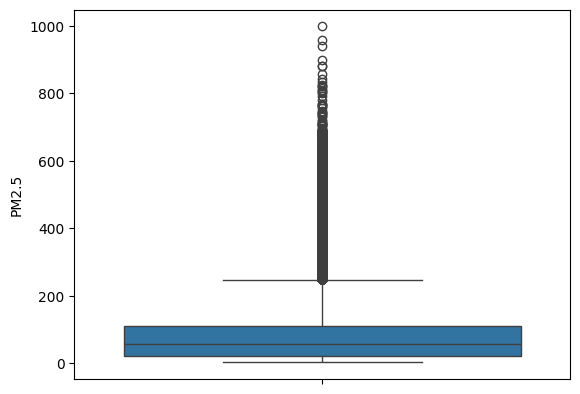

In [20]:
sns.boxplot(data=beijing_airquality_df["PM2.5"])

<Axes: ylabel='PM10'>

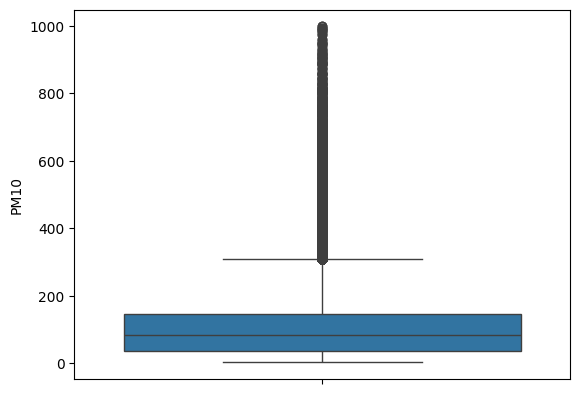

In [21]:
sns.boxplot(data=beijing_airquality_df["PM10"])

<Axes: ylabel='SO2'>

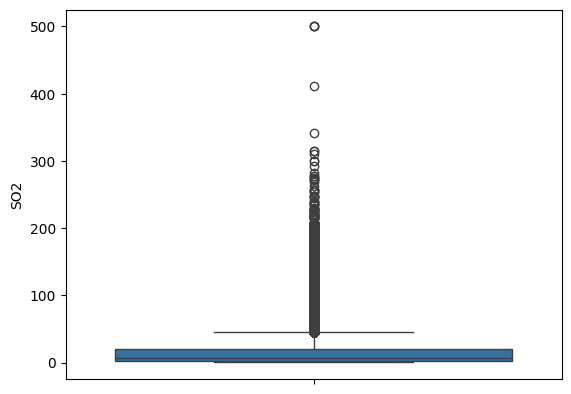

In [22]:
sns.boxplot(data=beijing_airquality_df["SO2"])

<Axes: ylabel='NO2'>

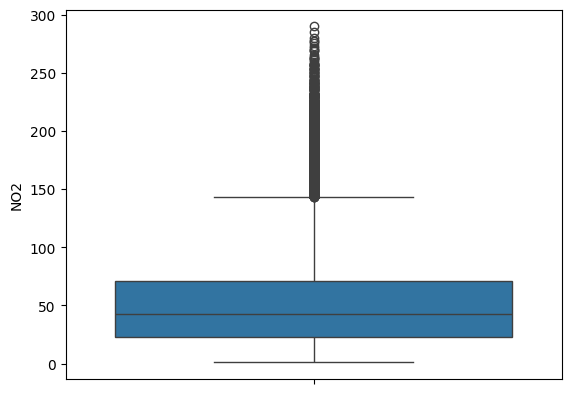

In [23]:
sns.boxplot(data=beijing_airquality_df["NO2"])

<Axes: ylabel='CO'>

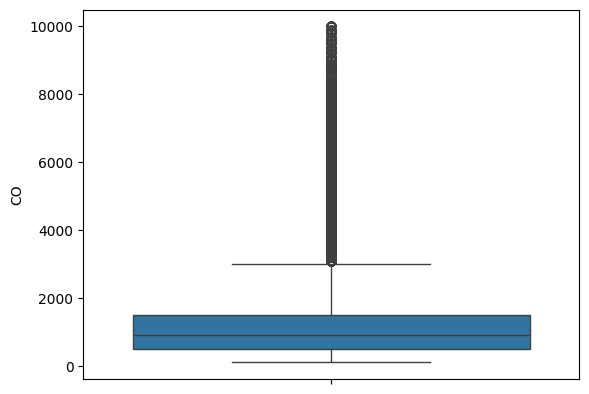

In [24]:
sns.boxplot(data=beijing_airquality_df["CO"])

<Axes: ylabel='O3'>

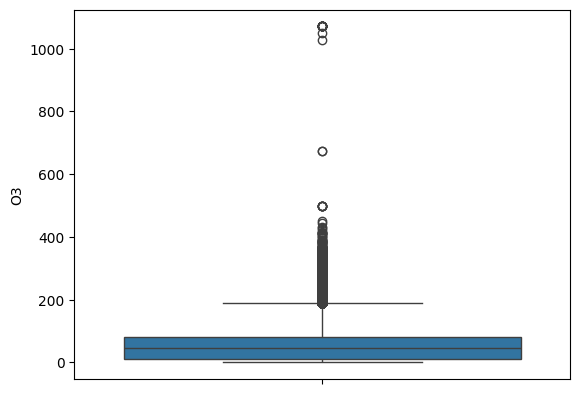

In [25]:
sns.boxplot(data=beijing_airquality_df["O3"])

<Axes: ylabel='TEMP'>

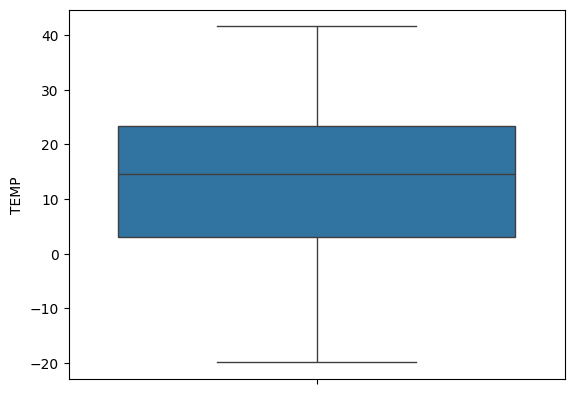

In [26]:
sns.boxplot(data=beijing_airquality_df["TEMP"])

<Axes: ylabel='PRES'>

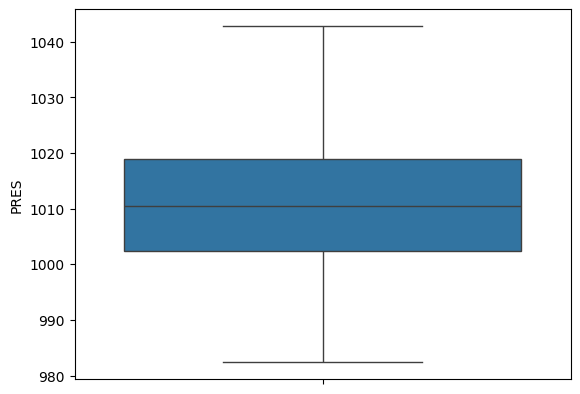

In [27]:
sns.boxplot(data=beijing_airquality_df["PRES"])

<Axes: ylabel='DEWP'>

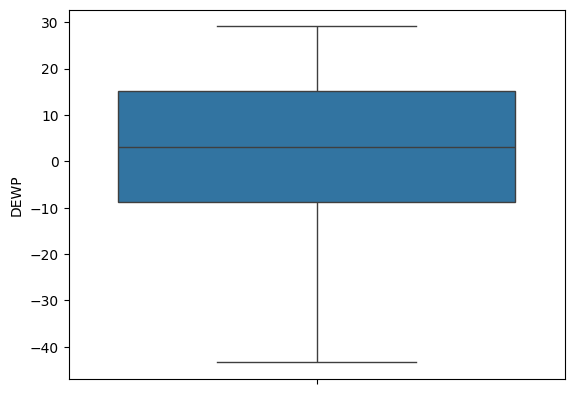

In [28]:
sns.boxplot(data=beijing_airquality_df["DEWP"])

<Axes: ylabel='RAIN'>

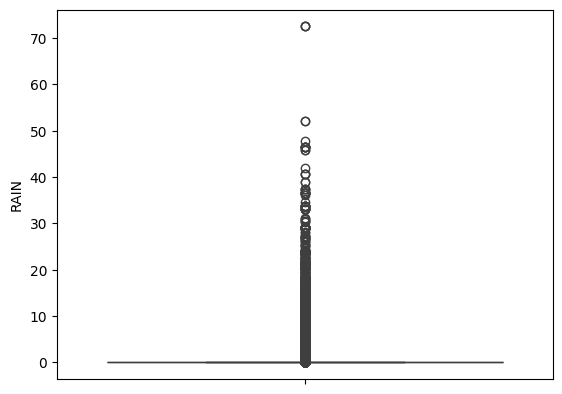

In [29]:
sns.boxplot(data=beijing_airquality_df["RAIN"])

<Axes: ylabel='WSPM'>

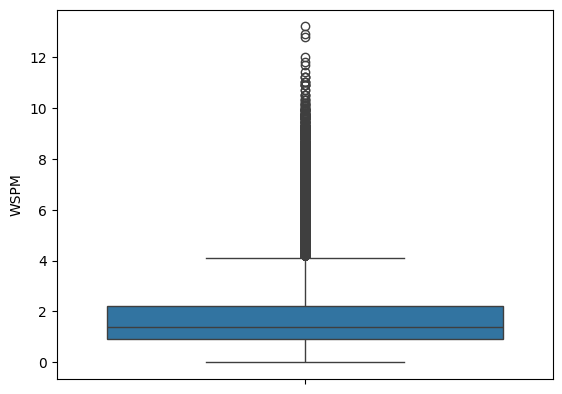

In [30]:
sns.boxplot(data=beijing_airquality_df["WSPM"])

<Axes: ylabel='wd'>

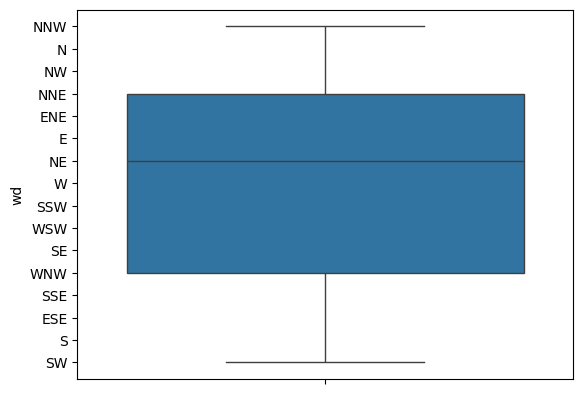

In [31]:
sns.boxplot(data=beijing_airquality_df["wd"])

<Axes: ylabel='station'>

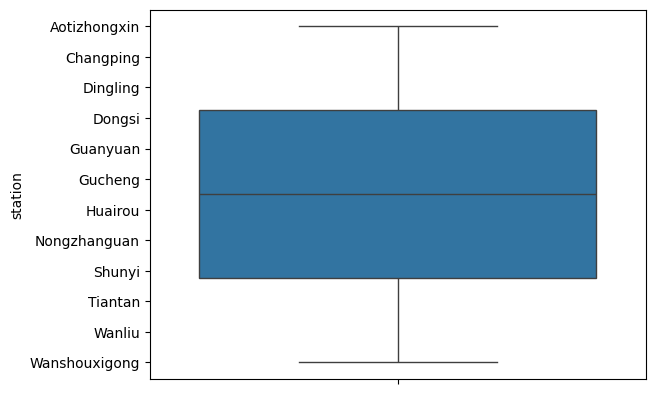

In [32]:
sns.boxplot(data=beijing_airquality_df["station"])

__Insights:__

1. Jumlah Missing Values 74027
2. Kolom Year, Month, Day, Hour bertipe int
3. Terdapat outliers pada 8 kolom

___

1. Total Missing Values 74027
2. Column Year, Month, Day, Hour data type is int
3. Has outliers in 8 columns

### 1.3. Data Cleaning

| Kota | Tipe Data | Missing Value | Duplicate Data | Invalid Value | Outliers |
| :----: | :-------: | :-----------: | :------------: | :-------------: | :------:|
| Beijing | Year, Month, Day, Hour | 74027 | 0 | - | 8 Kolom |

Menyatukan kolom Year, Month, Day, dan Hour dalam sebuah kolom bernama datetime

___

Combine Year, Month, Day, and Hour columns into one column named datetime

In [33]:
beijing_airquality_df["datetime"] = pd.to_datetime(beijing_airquality_df[["year", "month", "day"]]) + pd.to_timedelta(beijing_airquality_df["hour"], unit="h")
col = "datetime"
beijing_airquality_df.insert(1, col, beijing_airquality_df.pop(col)) 
beijing_airquality_df.drop(["year", "month", "day", "hour"], axis=1, inplace=True)
beijing_airquality_df

,No,datetime,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013-03-01 00:00:00,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013-03-01 01:00:00,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013-03-01 02:00:00,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013-03-01 03:00:00,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013-03-01 04:00:00,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,35060,2017-02-28 19:00:00,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,35061,2017-02-28 20:00:00,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,35062,2017-02-28 21:00:00,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,35063,2017-02-28 22:00:00,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


In [34]:
beijing_airquality_df.reset_index(drop=True, inplace=True)
beijing_airquality_df["No"] = range(1, len(beijing_airquality_df) + 1) 
beijing_airquality_df

,No,datetime,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013-03-01 00:00:00,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013-03-01 01:00:00,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013-03-01 02:00:00,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013-03-01 03:00:00,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013-03-01 04:00:00,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,420764,2017-02-28 19:00:00,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,420765,2017-02-28 20:00:00,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,420766,2017-02-28 21:00:00,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,420767,2017-02-28 22:00:00,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


Kode di bawah bertujuan untuk mengatasi missing values dengan berbagai metode:

1. Interpolasi: Jika distribusi data tidak normal
2. Median: Jika distribusi data normal
3. Modus: Jika tipe data kategorik

___

The code below aims to overcome missing values ​​with various methods:

1. Interpolation: If the data distribution is not normal
2. Median: If the data distribution is normal
3. Mode: If the data type is categorical

In [35]:
for col in beijing_airquality_df.columns:
        missing_count = beijing_airquality_df[col].isna().sum()
        
        if missing_count > 0:  
            
            if beijing_airquality_df[col].dtype in ['int64', 'float64']:  
                if beijing_airquality_df[col].skew() > 1 or beijing_airquality_df[col].skew() < -1:
                    beijing_airquality_df[col].interpolate(method="linear", limit_direction="forward", inplace=True)
                else:
                    beijing_airquality_df[col].fillna(beijing_airquality_df[col].median(), inplace=True) 
                    
            elif beijing_airquality_df[col].dtype == 'object': 
                beijing_airquality_df[col].fillna(beijing_airquality_df[col].mode()[0], inplace=True)

C:\Users\Randy Sam\AppData\Local\Temp\ipykernel_22180\3410345798.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  beijing_airquality_df[col].interpolate(method="linear", limit_direction="forward", inplace=True)
C:\Users\Randy Sam\AppData\Local\Temp\ipykernel_22180\3410345798.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which

In [36]:
beijing_airquality_df.isnull().sum()

No          0
datetime    0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
dtype: int64

##### 1.3.1. Membersihkan Outliers/Clean Outliers

In [37]:
upper_limit = beijing_airquality_df['PM2.5'].mean() + beijing_airquality_df['PM2.5'].std() * 3
lower_limit = beijing_airquality_df['PM2.5'].mean() - beijing_airquality_df['PM2.5'].std() * 3
print(f"Upper Limit: {upper_limit}")
print(f"Lower Limit: {lower_limit}")

Upper Limit: 322.69036934498627
Lower Limit: -163.01093245815076


In [38]:
Q1 = (beijing_airquality_df["PM2.5"]).quantile(0.25)
Q3 = (beijing_airquality_df["PM2.5"]).quantile(0.75)
IQR = Q3 - Q1
 
maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)
 
kondisi_lower_than = beijing_airquality_df["PM2.5"] < minimum
kondisi_more_than = beijing_airquality_df["PM2.5"] > maximum
 
beijing_airquality_df["PM2.5"].mask(beijing_airquality_df["PM2.5"] > maximum, maximum, inplace=True)
beijing_airquality_df["PM2.5"].mask(beijing_airquality_df["PM2.5"] < minimum, minimum, inplace=True)

C:\Users\Randy Sam\AppData\Local\Temp\ipykernel_22180\2423035751.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  beijing_airquality_df["PM2.5"].mask(beijing_airquality_df["PM2.5"] > maximum, maximum, inplace=True)
C:\Users\Randy Sam\AppData\Local\Temp\ipykernel_22180\2423035751.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on 

<Axes: ylabel='PM2.5'>

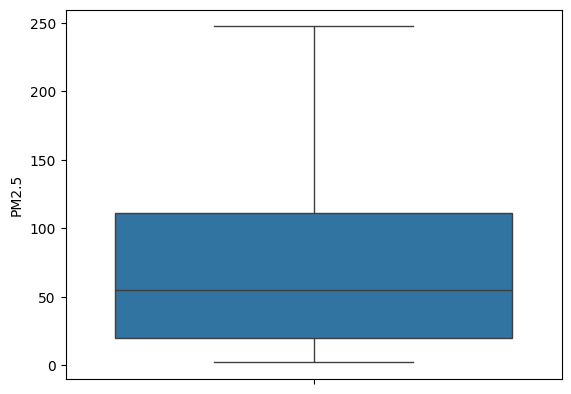

In [39]:
sns.boxplot(data=beijing_airquality_df["PM2.5"])

In [40]:
upper_limit = beijing_airquality_df['PM10'].mean() + beijing_airquality_df['PM10'].std() * 3
lower_limit = beijing_airquality_df['PM10'].mean() - beijing_airquality_df['PM10'].std() * 3
print(f"Upper Limit: {upper_limit}")
print(f"Lower Limit: {lower_limit}")

Upper Limit: 382.2045337360976
Lower Limit: -172.38399819156942


In [41]:
Q1 = (beijing_airquality_df["PM10"]).quantile(0.25)
Q3 = (beijing_airquality_df["PM10"]).quantile(0.75)
IQR = Q3 - Q1
 
maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)
 
kondisi_lower_than = beijing_airquality_df["PM10"] < minimum
kondisi_more_than = beijing_airquality_df["PM10"] > maximum
 
beijing_airquality_df["PM10"].mask(beijing_airquality_df["PM10"] > maximum, maximum, inplace=True)
beijing_airquality_df["PM10"].mask(beijing_airquality_df["PM10"] < minimum, minimum, inplace=True)

C:\Users\Randy Sam\AppData\Local\Temp\ipykernel_22180\60990546.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  beijing_airquality_df["PM10"].mask(beijing_airquality_df["PM10"] > maximum, maximum, inplace=True)
C:\Users\Randy Sam\AppData\Local\Temp\ipykernel_22180\60990546.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which 

<Axes: ylabel='PM10'>

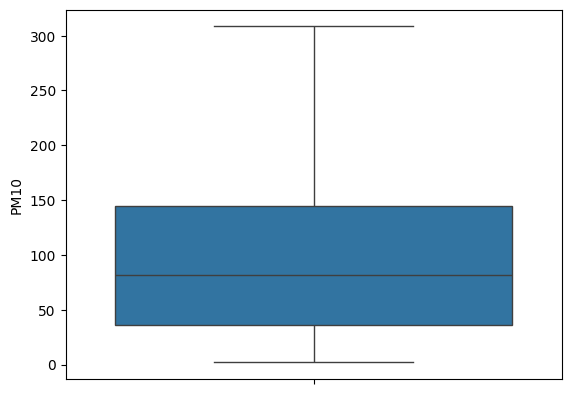

In [42]:
sns.boxplot(data=beijing_airquality_df["PM10"])

In [43]:
upper_limit = beijing_airquality_df['SO2'].mean() + beijing_airquality_df['SO2'].std() * 3
lower_limit = beijing_airquality_df['SO2'].mean() - beijing_airquality_df['SO2'].std() * 3
print(f"Upper Limit: {upper_limit}")
print(f"Lower Limit: {lower_limit}")

Upper Limit: 81.60291723316595
Lower Limit: -49.776737325948666


In [44]:
Q1 = (beijing_airquality_df["SO2"]).quantile(0.25)
Q3 = (beijing_airquality_df["SO2"]).quantile(0.75)
IQR = Q3 - Q1
 
maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)
 
kondisi_lower_than = beijing_airquality_df["SO2"] < minimum
kondisi_more_than = beijing_airquality_df["SO2"] > maximum
 
beijing_airquality_df["SO2"].mask(beijing_airquality_df["SO2"] > maximum, maximum, inplace=True)
beijing_airquality_df["SO2"].mask(beijing_airquality_df["SO2"] < minimum, minimum, inplace=True)

C:\Users\Randy Sam\AppData\Local\Temp\ipykernel_22180\992925664.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  beijing_airquality_df["SO2"].mask(beijing_airquality_df["SO2"] > maximum, maximum, inplace=True)
C:\Users\Randy Sam\AppData\Local\Temp\ipykernel_22180\992925664.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which 

<Axes: ylabel='SO2'>

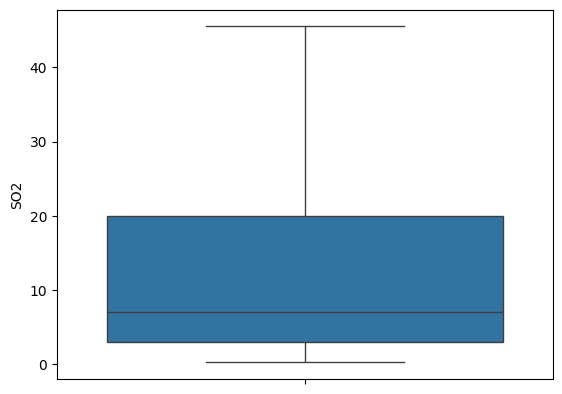

In [45]:
sns.boxplot(data=beijing_airquality_df["SO2"])

In [46]:
upper_limit = beijing_airquality_df['NO2'].mean() + beijing_airquality_df['NO2'].std() * 3
lower_limit = beijing_airquality_df['NO2'].mean() - beijing_airquality_df['NO2'].std() * 3
print(f"Upper Limit: {upper_limit}")
print(f"Lower Limit: {lower_limit}")

Upper Limit: 156.11284833368217
Lower Limit: -54.912407988408745


In [47]:
Q1 = (beijing_airquality_df["NO2"]).quantile(0.25)
Q3 = (beijing_airquality_df["NO2"]).quantile(0.75)
IQR = Q3 - Q1
 
maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)
 
kondisi_lower_than = beijing_airquality_df["NO2"] < minimum
kondisi_more_than = beijing_airquality_df["NO2"] > maximum
 
beijing_airquality_df["NO2"].mask(beijing_airquality_df["NO2"] > maximum, maximum, inplace=True)
beijing_airquality_df["NO2"].mask(beijing_airquality_df["NO2"] < minimum, minimum, inplace=True)

C:\Users\Randy Sam\AppData\Local\Temp\ipykernel_22180\2513055035.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  beijing_airquality_df["NO2"].mask(beijing_airquality_df["NO2"] > maximum, maximum, inplace=True)
C:\Users\Randy Sam\AppData\Local\Temp\ipykernel_22180\2513055035.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whic

<Axes: ylabel='NO2'>

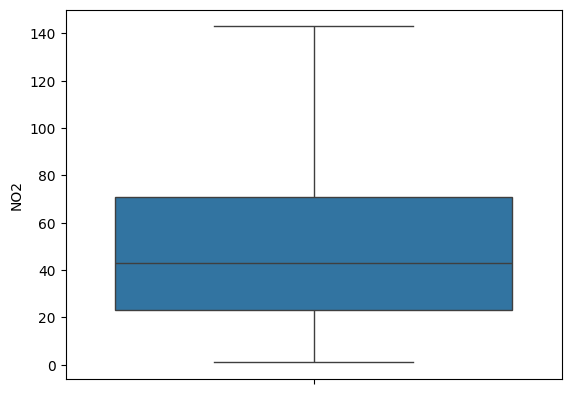

In [48]:
sns.boxplot(data=beijing_airquality_df["NO2"])

In [49]:
upper_limit = beijing_airquality_df['CO'].mean() + beijing_airquality_df['CO'].std() * 3
lower_limit = beijing_airquality_df['CO'].mean() - beijing_airquality_df['CO'].std() * 3
print(f"Upper Limit: {upper_limit}")
print(f"Lower Limit: {lower_limit}")

Upper Limit: 4721.055328117256
Lower Limit: -2249.690029425341


In [50]:
Q1 = (beijing_airquality_df["CO"]).quantile(0.25)
Q3 = (beijing_airquality_df["CO"]).quantile(0.75)
IQR = Q3 - Q1
 
maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)
 
kondisi_lower_than = beijing_airquality_df["CO"] < minimum
kondisi_more_than = beijing_airquality_df["CO"] > maximum
 
beijing_airquality_df["CO"].mask(beijing_airquality_df["CO"] > maximum, maximum, inplace=True)
beijing_airquality_df["CO"].mask(beijing_airquality_df["CO"] < minimum, minimum, inplace=True)

C:\Users\Randy Sam\AppData\Local\Temp\ipykernel_22180\1377735168.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  beijing_airquality_df["CO"].mask(beijing_airquality_df["CO"] > maximum, maximum, inplace=True)
C:\Users\Randy Sam\AppData\Local\Temp\ipykernel_22180\1377735168.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which 

<Axes: ylabel='CO'>

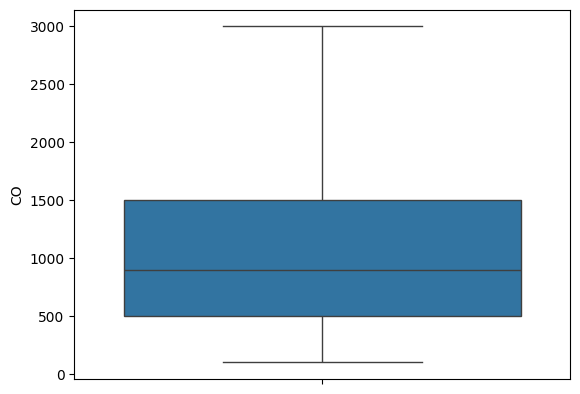

In [51]:
sns.boxplot(data=beijing_airquality_df["CO"])

In [52]:
upper_limit = beijing_airquality_df['CO'].mean() + beijing_airquality_df['CO'].std() * 3
lower_limit = beijing_airquality_df['CO'].mean() - beijing_airquality_df['CO'].std() * 3
print(f"Upper Limit: {upper_limit}")
print(f"Lower Limit: {lower_limit}")

Upper Limit: 3586.8658179582326
Lower Limit: -1323.8073608354755


In [53]:
Q1 = (beijing_airquality_df["O3"]).quantile(0.25)
Q3 = (beijing_airquality_df["O3"]).quantile(0.75)
IQR = Q3 - Q1
 
maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)
 
kondisi_lower_than = beijing_airquality_df["O3"] < minimum
kondisi_more_than = beijing_airquality_df["O3"] > maximum
 
beijing_airquality_df["O3"].mask(beijing_airquality_df["O3"] > maximum, maximum, inplace=True)
beijing_airquality_df["O3"].mask(beijing_airquality_df["O3"] < minimum, minimum, inplace=True)

C:\Users\Randy Sam\AppData\Local\Temp\ipykernel_22180\3532182818.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  beijing_airquality_df["O3"].mask(beijing_airquality_df["O3"] > maximum, maximum, inplace=True)
C:\Users\Randy Sam\AppData\Local\Temp\ipykernel_22180\3532182818.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which 

<Axes: ylabel='O3'>

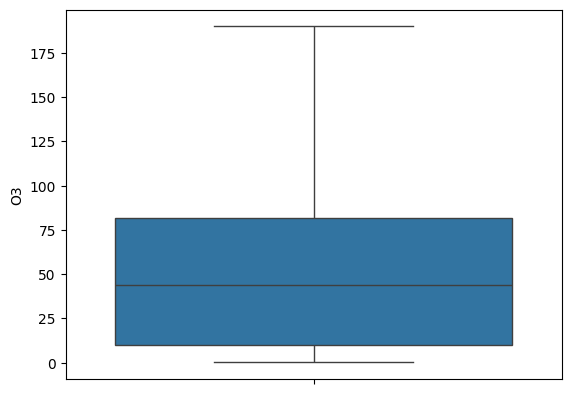

In [54]:
sns.boxplot(data=beijing_airquality_df["O3"])

In [55]:
upper_limit = beijing_airquality_df['RAIN'].mean() + beijing_airquality_df['RAIN'].std() * 3
lower_limit = beijing_airquality_df['RAIN'].mean() - beijing_airquality_df['RAIN'].std() * 3
print(f"Upper Limit: {upper_limit}")
print(f"Lower Limit: {lower_limit}")

Upper Limit: 2.5263434296316913
Lower Limit: -2.3974864348031875


In [56]:
Q1 = (beijing_airquality_df["RAIN"]).quantile(0.25)
Q3 = (beijing_airquality_df["RAIN"]).quantile(0.75)
IQR = Q3 - Q1
 
maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)
 
kondisi_lower_than = beijing_airquality_df["RAIN"] < minimum
kondisi_more_than = beijing_airquality_df["RAIN"] > maximum
 
beijing_airquality_df["RAIN"].mask(beijing_airquality_df["RAIN"] > maximum, maximum, inplace=True)
beijing_airquality_df["RAIN"].mask(beijing_airquality_df["RAIN"] < minimum, minimum, inplace=True)

C:\Users\Randy Sam\AppData\Local\Temp\ipykernel_22180\333807921.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  beijing_airquality_df["RAIN"].mask(beijing_airquality_df["RAIN"] > maximum, maximum, inplace=True)
C:\Users\Randy Sam\AppData\Local\Temp\ipykernel_22180\333807921.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whic

<Axes: ylabel='RAIN'>

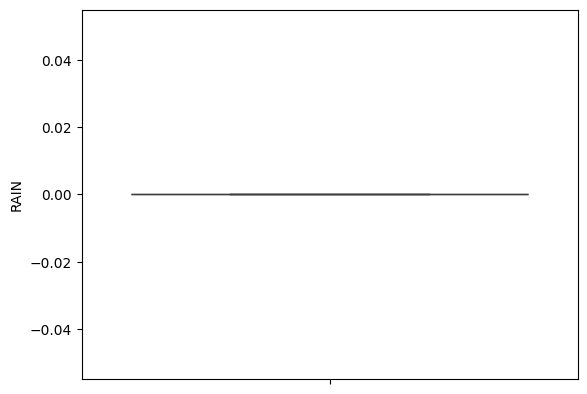

In [57]:
sns.boxplot(data=beijing_airquality_df["RAIN"])

In [58]:
upper_limit = beijing_airquality_df['WSPM'].mean() + beijing_airquality_df['WSPM'].std() * 3
lower_limit = beijing_airquality_df['WSPM'].mean() - beijing_airquality_df['WSPM'].std() * 3
print(f"Upper Limit: {upper_limit}")
print(f"Lower Limit: {lower_limit}")

Upper Limit: 5.470055401071905
Lower Limit: -2.009987620252071


In [59]:
Q1 = (beijing_airquality_df["WSPM"]).quantile(0.25)
Q3 = (beijing_airquality_df["WSPM"]).quantile(0.75)
IQR = Q3 - Q1
 
maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)
 
kondisi_lower_than = beijing_airquality_df["WSPM"] < minimum
kondisi_more_than = beijing_airquality_df["WSPM"] > maximum
 
beijing_airquality_df["WSPM"].mask(beijing_airquality_df["WSPM"] > maximum, maximum, inplace=True)
beijing_airquality_df["WSPM"].mask(beijing_airquality_df["WSPM"] < minimum, minimum, inplace=True)

C:\Users\Randy Sam\AppData\Local\Temp\ipykernel_22180\1566304568.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  beijing_airquality_df["WSPM"].mask(beijing_airquality_df["WSPM"] > maximum, maximum, inplace=True)
C:\Users\Randy Sam\AppData\Local\Temp\ipykernel_22180\1566304568.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on wh

<Axes: ylabel='WSPM'>

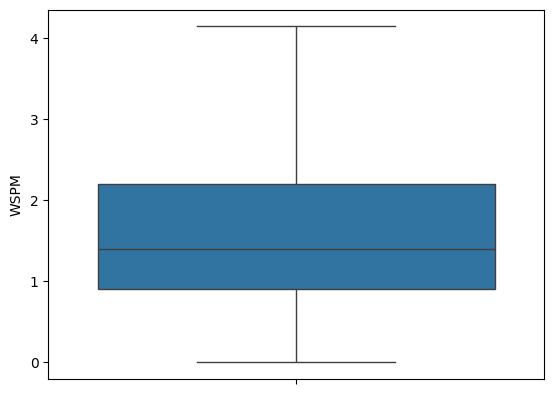

In [60]:
sns.boxplot(data=beijing_airquality_df["WSPM"])

In [61]:
beijing_airquality_df.drop(["RAIN"], inplace=True, axis=1)

__Insights:__

1. Mengatasi Missing Values dengan menggunakan metode interpolasi, median, dan modus
2. Kolom Rain tidak berguna karena nilai keseluruhan nya adalah 0
3. Membersihkan outliers dengan menggunakan metode Imputation
4. Keseluruhan dataset telah bersih

___

1. Overcome Missing Values with interpolation, median, and mode
2. The Rain column is useless because its overall value is 0
3. Cleaning outliers using the Imputation method
4. The entire dataset is clean

# __2. Exploratory Data Analysis__ 

In [62]:
beijing_airquality_df.describe(include="all").round(2)

,No,datetime,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,wd,WSPM,station
count,420768.00,420768,420768.00,420768.00,420768.00,420768.00,420768.00,420768.00,420768.00,420768.00,420768.00,420768,420768.00,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45157,NaN,35064
mean,210384.50,2015-03-01 11:30:00.000001024,76.06,101.46,13.53,50.20,1131.53,55.59,13.54,1010.75,2.49,NaN,1.67,NaN
min,1.00,2013-03-01 00:00:00,2.00,2.00,0.29,1.03,100.00,0.21,-19.90,982.40,-43.40,NaN,0.00,NaN
25%,105192.75,2014-03-01 05:45:00,20.00,36.00,3.00,23.00,500.00,10.00,3.10,1002.30,-8.90,NaN,0.90,NaN
50%,210384.50,2015-03-01 11:30:00,55.00,82.00,7.00,43.00,900.00,44.00,14.50,1010.40,3.10,NaN,1.40,NaN
75%,315576.25,2016-02-29 17:15:00,111.00,145.00,20.00,71.00,1500.00,82.00,23.20,1019.00,15.10,NaN,2.20,NaN
max,420768.00,2017-02-28 23:00:00,247.50,308.50,45.50,143.00,3000.00,190.00,41.60,1042.80,29.10,NaN,4.15,NaN


In [63]:
beijing_airquality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   No        420768 non-null  int64         
 1   datetime  420768 non-null  datetime64[ns]
 2   PM2.5     420768 non-null  float64       
 3   PM10      420768 non-null  float64       
 4   SO2       420768 non-null  float64       
 5   NO2       420768 non-null  float64       
 6   CO        420768 non-null  float64       
 7   O3        420768 non-null  float64       
 8   TEMP      420768 non-null  float64       
 9   PRES      420768 non-null  float64       
 10  DEWP      420768 non-null  float64       
 11  wd        420768 non-null  object        
 12  WSPM      420768 non-null  float64       
 13  station   420768 non-null  object        
dtypes: datetime64[ns](1), float64(10), int64(1), object(2)
memory usage: 44.9+ MB


In [64]:
beijing_airquality_df.head()

,No,datetime,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,wd,WSPM,station
0,1,2013-03-01 00:00:00,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,NNW,4.15,Aotizhongxin
1,2,2013-03-01 01:00:00,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,N,4.15,Aotizhongxin
2,3,2013-03-01 02:00:00,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,NNW,4.15,Aotizhongxin
3,4,2013-03-01 03:00:00,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,NW,3.10,Aotizhongxin
4,5,2013-03-01 04:00:00,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,N,2.00,Aotizhongxin


# __3. Data Visualization__

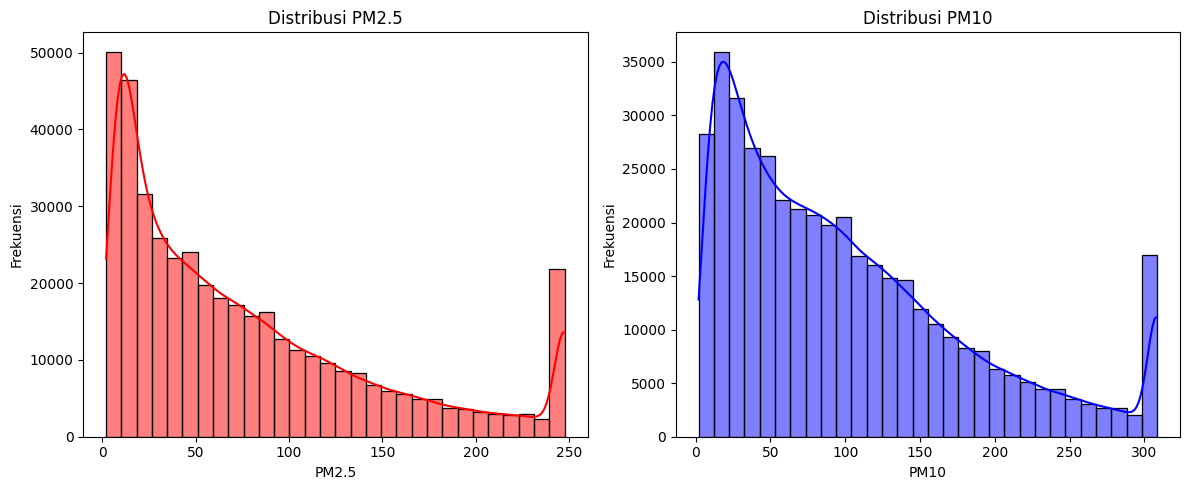

In [64]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(beijing_airquality_df["PM2.5"], bins=30, kde=True, color="red")
plt.title("Distribusi PM2.5")
plt.xlabel("PM2.5")
plt.ylabel("Frekuensi")

plt.subplot(1, 2, 2)
sns.histplot(beijing_airquality_df["PM10"], bins=30, kde=True, color="blue")
plt.title("Distribusi PM10")
plt.xlabel("PM10")
plt.ylabel("Frekuensi")

plt.tight_layout()
plt.show()

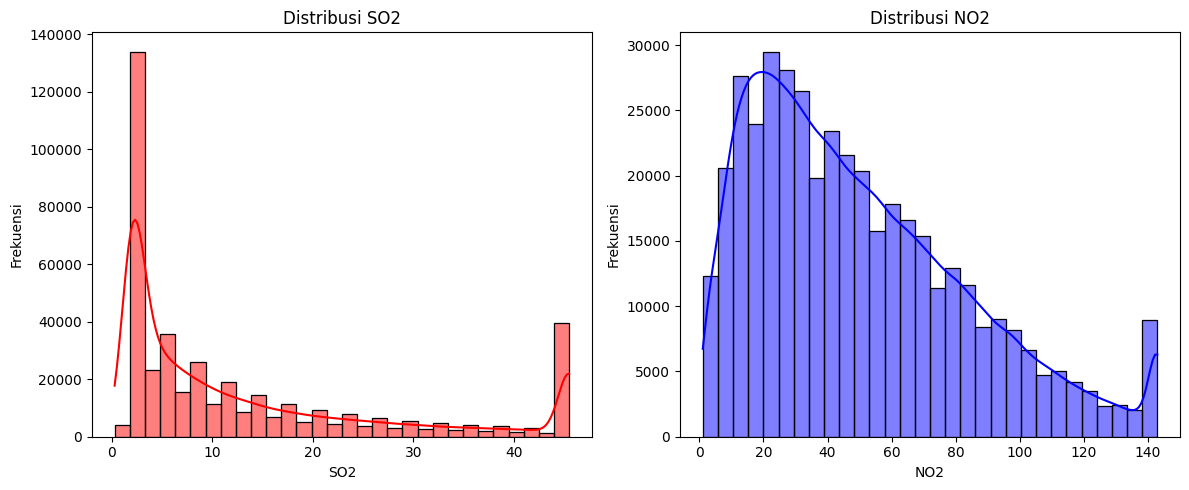

In [65]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(beijing_airquality_df["SO2"], bins=30, kde=True, color="red")
plt.title("Distribusi SO2")
plt.xlabel("SO2")
plt.ylabel("Frekuensi")

plt.subplot(1, 2, 2)
sns.histplot(beijing_airquality_df["NO2"], bins=30, kde=True, color="blue")
plt.title("Distribusi NO2")
plt.xlabel("NO2")
plt.ylabel("Frekuensi")

plt.tight_layout()
plt.show()

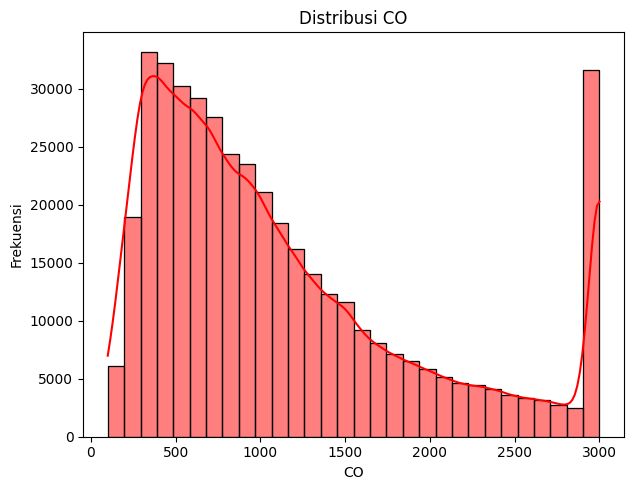

In [66]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(beijing_airquality_df["CO"], bins=30, kde=True, color="red")
plt.title("Distribusi CO")
plt.xlabel("CO")
plt.ylabel("Frekuensi")

plt.tight_layout()
plt.show()

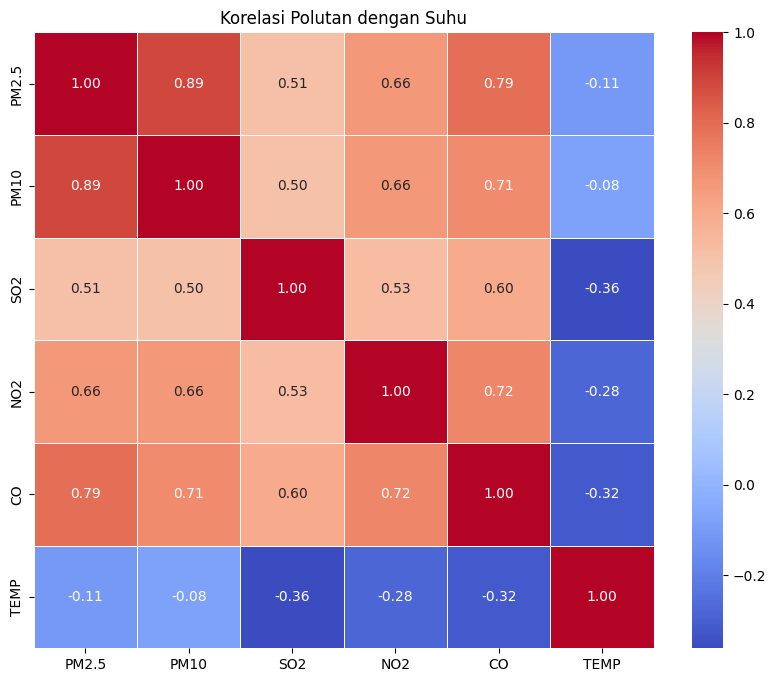

In [67]:
correlation_matrix = beijing_airquality_df[["PM2.5", "PM10", "SO2", "NO2", "CO", "TEMP"]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Korelasi Polutan dengan Suhu")
plt.show()


Tahun


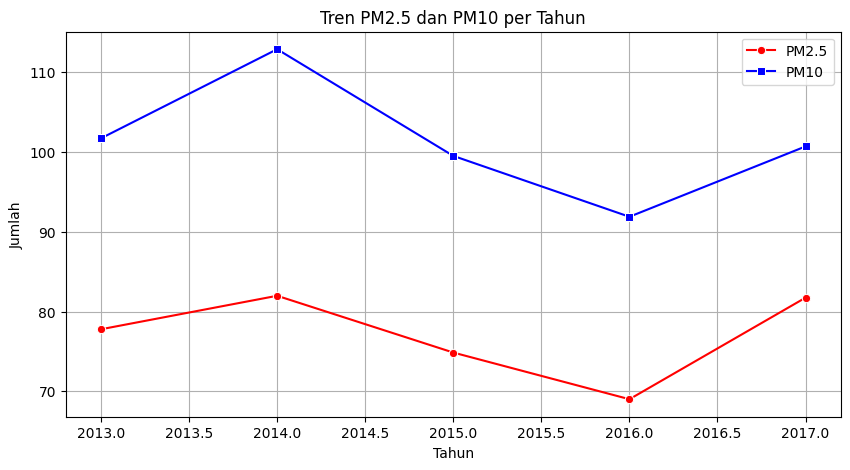

In [68]:
beijing_airquality_df["year"] = beijing_airquality_df["datetime"].dt.year
beijing_airquality_df["month"] = beijing_airquality_df["datetime"].dt.month

pm25_yearly = beijing_airquality_df.groupby("year")["PM2.5"].mean()
pm10_yearly = beijing_airquality_df.groupby("year")["PM10"].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=pm25_yearly.index, y=pm25_yearly.values, marker="o", label="PM2.5", color="red")
sns.lineplot(x=pm10_yearly.index, y=pm10_yearly.values, marker="s", label="PM10", color="blue")

plt.title("Tren PM2.5 dan PM10 per Tahun")
plt.xlabel("Tahun")
plt.ylabel("Jumlah")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df["year"] = df["datetime"].dt.year
    df["month"] = df["datetime"].dt.month
    df["day"] = df["datetime"].dt.day

    pm25_day = df.groupby("day")["PM2.5"].mean()
    pm10_day = df.groupby("day")["PM10"].mean()

    fig, ax = plt.subplots(figsize=(10, 5))
    sns.lineplot(x=pm25_day.index, y=pm25_day.values, marker="o", label="PM2.5", color="red")
    sns.lineplot(x=pm10_day.index, y=pm10_day.values, marker="s", label="PM10", color="blue")

    ax.set_title("Tren PM2.5 dan PM10 per Tahun")
    ax.set_xlabel("Tahun")
    ax.set_ylabel("Jumlah")
    ax.legend()
    ax.grid(True)
    st.pyplot(fig)


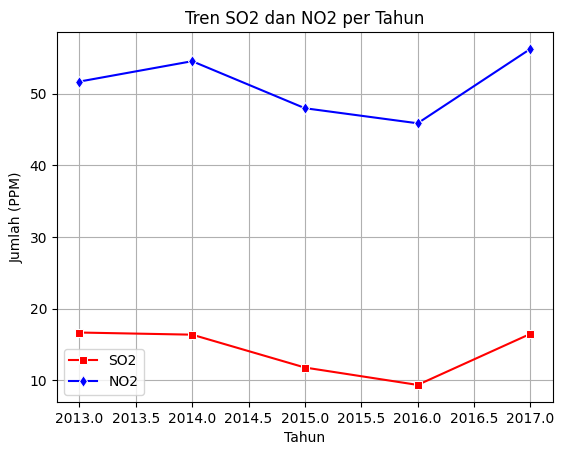

In [69]:
so2_yearly = beijing_airquality_df.groupby("year")["SO2"].mean()
no2_yearly = beijing_airquality_df.groupby("year")["NO2"].mean()
sns.lineplot(x=so2_yearly.index, y=so2_yearly.values, marker="s", label="SO2", color="red")
sns.lineplot(x=no2_yearly.index, y=no2_yearly.values, marker="d", label="NO2", color="blue")

plt.title("Tren SO2 dan NO2 per Tahun")
plt.xlabel("Tahun")
plt.ylabel("Jumlah (PPM)")
plt.legend()
plt.grid(True)
plt.show()

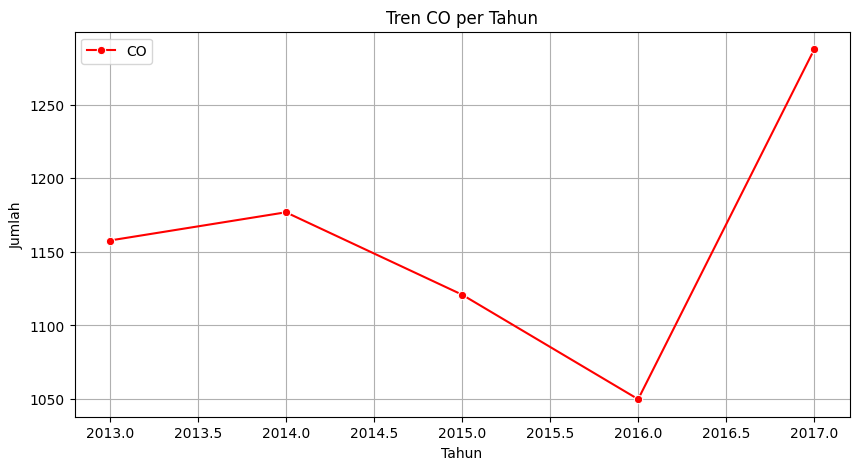

In [70]:
co_yearly = beijing_airquality_df.groupby("year")["CO"].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=co_yearly.index, y=co_yearly.values, marker="o", label="CO", color="red")

plt.title("Tren CO per Tahun")
plt.xlabel("Tahun")
plt.ylabel("Jumlah")
plt.legend()
plt.grid(True)
plt.show()

Bulan


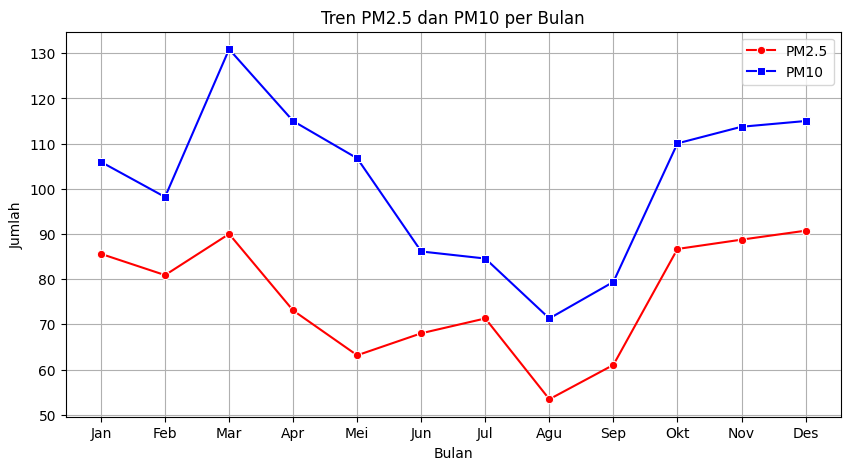

In [71]:
pm25_monthly = beijing_airquality_df.groupby("month")["PM2.5"].mean()
pm10_monthly = beijing_airquality_df.groupby("month")["PM10"].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=pm25_monthly.index, y=pm25_monthly.values, marker="o", label="PM2.5", color="red")
sns.lineplot(x=pm10_monthly.index, y=pm10_monthly.values, marker="s", label="PM10", color="blue")

plt.title("Tren PM2.5 dan PM10 per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah")
plt.xticks(range(1, 13), [
    "Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agu", "Sep", "Okt", "Nov", "Des"
])
plt.legend()
plt.grid(True)
plt.show()

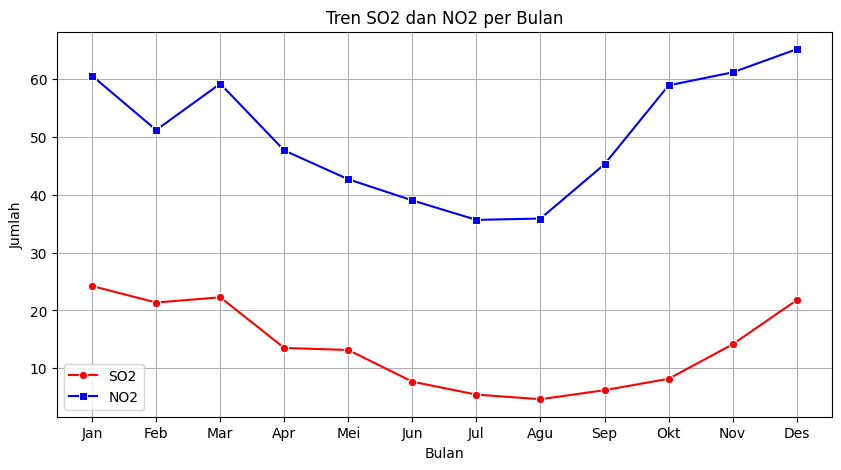

In [72]:
so2_monthly = beijing_airquality_df.groupby("month")["SO2"].mean()
no2_monthly = beijing_airquality_df.groupby("month")["NO2"].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=so2_monthly.index, y=so2_monthly.values, marker="o", label="SO2", color="red")
sns.lineplot(x=no2_monthly.index, y=no2_monthly.values, marker="s", label="NO2", color="blue")

plt.title("Tren SO2 dan NO2 per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah")
plt.xticks(range(1, 13), [
    "Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agu", "Sep", "Okt", "Nov", "Des"
])
plt.legend()
plt.grid(True)
plt.show()

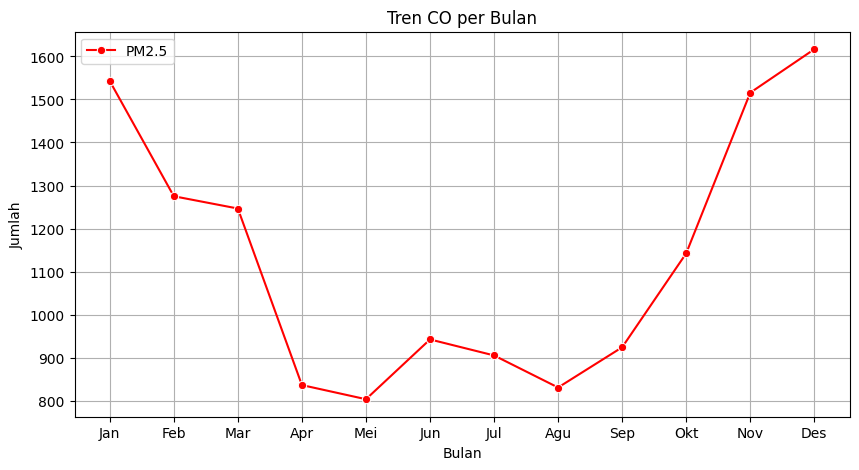

In [73]:
co_monthly = beijing_airquality_df.groupby("month")["CO"].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=co_monthly.index, y=co_monthly.values, marker="o", label="PM2.5", color="red")

plt.title("Tren CO per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah")
plt.xticks(range(1, 13), [
    "Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agu", "Sep", "Okt", "Nov", "Des"
])
plt.legend()
plt.grid(True)
plt.show()

__Conclusions__

1. Distribusi
- PM2.5 dan PM10 right-skewed.
- SO2 right-skewed dan NO2 normal.
- CO right-skewed.

2. Korelasi antar setiap polutan dengan temperatur semuanya bernilai negatif yang menandakan jika suhu meningkat, maka polutan akan menurun.

3. Tahun:
- PM2.5 dan PM10 lebih tinggi pada tahun 2014.
- SO2, NO2, CO lebih tinggi pada tahun 2017.

Bulan:
- PM2.5 mencapai titik tertinggi pada bulan Desember.
- PM10 mencapai titik tertinggi pada bulan Maret.
- SO2 mencapai titik tertinggi pada bulan Maret.
- NO2 mencapai titik tertinggi pada bulan Desember.
- CO mencapai titik tertinggi pada bulan Desember.